# Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Mall_Customers.csv', delimiter=',')
df.head()
#df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Dataset Description

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Preprocessing

In [ ]:
df_new = df.drop('CustomerID', axis = 1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df_new.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

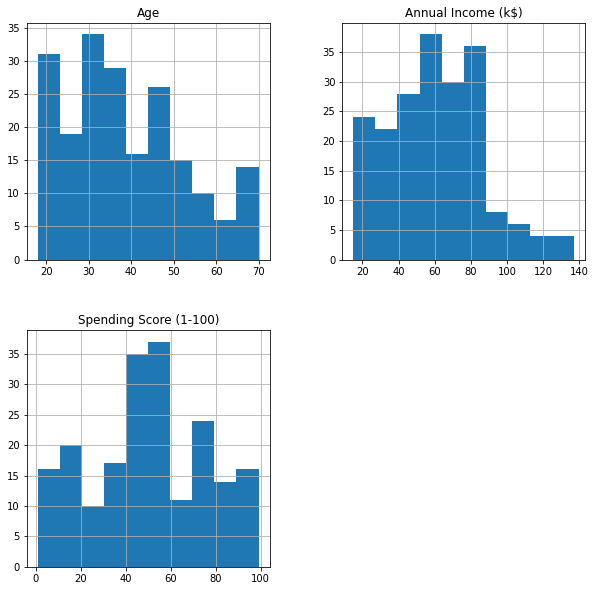

In [ ]:
df_new.hist(figsize=(10,10))
plt.show()

# Scaling

In [ ]:
encoder = LabelEncoder()
df_new['Gender'] = encoder.fit_transform(df_new['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = df_new.astype(float).values
scaler = MinMaxScaler().fit(X)
X_new= scaler.transform(X)
X_new

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [ ]:
X_new.shape

(200, 4)

# DBSCAN

### Sorted K-Distance Graph
Mencari Nilai Epsilon

In [ ]:
from sklearn.cluster import DBSCAN

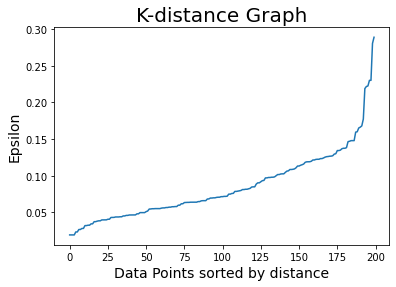

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_new)
distances, indices = neighbors_fit.kneighbors(X_new)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
# nilai eps mendekati 0.3

### DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=8)
db.fit(X_new)
labels = db.labels_
df_new['cluster_labels'] = labels
df_new.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
195,0,35,120,79,1
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,-1
199,1,30,137,83,-1


In [ ]:
print('Cluster : ', np.unique(labels))

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)
for i in range(-1, no_clusters-1):
  print('Cluster ', i, ' total member ', np.sum(np.array(labels) == i))

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Cluster :  [-1  0  1]
Cluster  -1  total member  9
Cluster  0  total member  80
Cluster  1  total member  111
Estimated no. of clusters: 3
Estimated no. of noise points: 9


# Remove Outlier

In [ ]:
df_clean = df_new[df_new.cluster_labels	 != -1]

In [ ]:
df_new.shape

(200, 5)

In [ ]:
df_clean.shape

(191, 5)

# Visualization

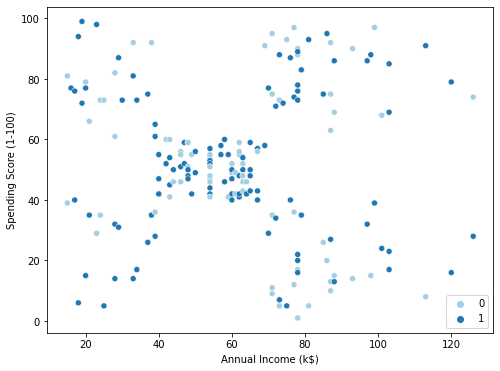

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_clean, palette='Paired')

plt.legend(loc='lower right')
plt.show()

## Agglomerative Clustering

### Visualizing the working of the Dendograms

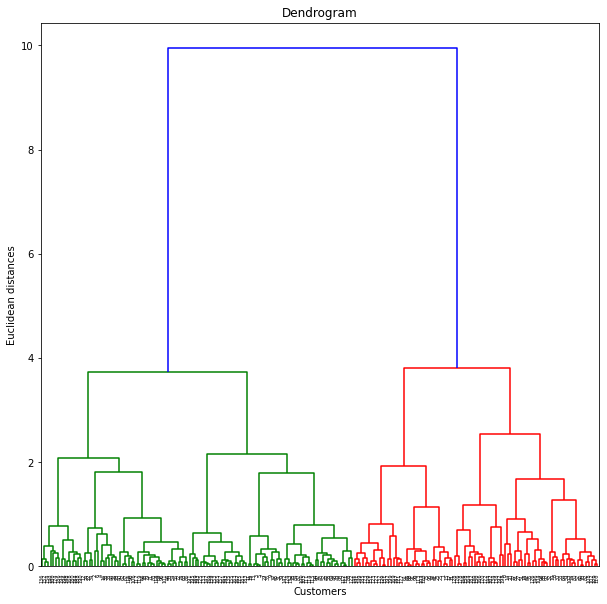

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_new, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Silhouette Method
untuk mencari jumlah cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = ac.fit_predict(X_new)

    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.5194624832665107)
For n_clusters = 3, silhouette score is 0.4469979431226989)
For n_clusters = 4, silhouette score is 0.3444266582171814)
For n_clusters = 5, silhouette score is 0.35032447507156306)
For n_clusters = 6, silhouette score is 0.3460050179221861)
For n_clusters = 7, silhouette score is 0.3643550186201911)
For n_clusters = 8, silhouette score is 0.3659419625588666)
For n_clusters = 9, silhouette score is 0.38894347203023516)
For n_clusters = 10, silhouette score is 0.41403790085368813)


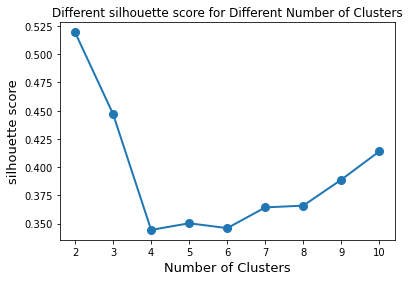

In [ ]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()


## Agglomerative Clustering

In [ ]:

ac = AgglomerativeClustering(n_clusters=2)
ac.fit(X_new)
labels = ac.labels_
df_new['cluster_labels'] = labels
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1


### Visualization

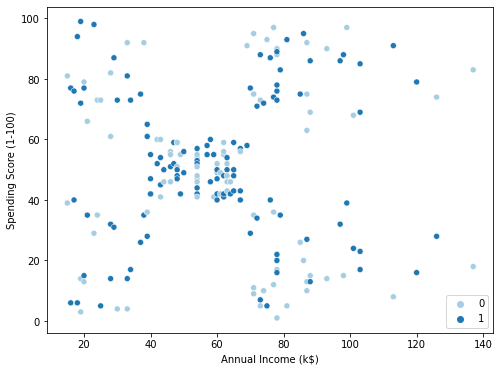

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()